# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

### 하이퍼 파라미터(Hyper Parameter)

In [2]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true): # MSE
    return np.mean(np.power(y_true - y_pred, 2))

def cross_entropy_error(y_pred, y_true):
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    return -np.sum(y_true * np.log(y_pred + delta))

def cross_entropy_error_for_batch(y_pred, y_true):
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    batch_size = y_pred.shape[0]
    return -np.sum(y_true * np.log(y_pred + delta)) / batch_size

def cross_entropy_error_for_bin(y_pred, y_true):
    return 0.5 * np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def differential(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
      temp_val = x[i]

      x[i] = temp_val + eps
      f_h1 = f(x)
      x[i] = temp_val - eps
      f_h2 = f(x)

      diff_value[i] = (f_h1 - f_h2) / (2*eps)
      x[i] = temp_val

    return diff_value


### 신경망

In [4]:
class LogicGateNet():

    def __init__(self):
        def weight_init():
            np.random.seed(1)
            weights = np.random.randn(2)
            bias = np.random.rand(1)

            return weights, bias

        self.weights, self.bias = weight_init()

    def predict(self, x):
        W = self.weights.reshape(-1, 1)
        b = self.bias

        y_pred = sigmoid(np.dot(x, W) + b)
        return y_pred

    def loss(self, x, y_true):
        y_pred = self.predict(x)
        return cross_entropy_error_for_bin(y_pred, y_true)


    def get_gradient(self, x, t):
        def loss_grad(grad):
            return self.loss(x, t)

        grad_W = differential(loss_grad, self.weights)
        grad_b = differential(loss_grad, self.bias)

        return grad_W, grad_b

### AND Gate

#### 모델 생성 및 학습

In [5]:
AND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_b = AND.get_gradient(X, Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_b

  loss = AND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 0:
    print('Epoch: {}, loss: {}, Weights: {}, Bias: {}'.format(i, loss, AND.weights, AND.bias))

Epoch: 0, loss: 1.5631544107938489, Weights: [ 1.59589746 -0.61601809], Bias: [-0.0709192]
Epoch: 100, loss: 0.6857716198198381, Weights: [1.56879204 0.80386655], Bias: [-2.15965133]
Epoch: 200, loss: 0.4933163179445829, Weights: [2.01797503 1.71943466], Bias: [-3.08693073]
Epoch: 300, loss: 0.39121669520130875, Weights: [2.43232215 2.30246439], Bias: [-3.79740008]
Epoch: 400, loss: 0.32517260605778037, Weights: [2.79827821 2.73621772], Bias: [-4.37788962]
Epoch: 500, loss: 0.2782329581540439, Weights: [3.11937435 3.08729741], Bias: [-4.87028742]
Epoch: 600, loss: 0.2429757370144252, Weights: [3.40282534 3.38512949], Bias: [-5.29835365]
Epoch: 700, loss: 0.21548037473693, Weights: [3.65539764 3.64508755], Bias: [-5.67707715]
Epoch: 800, loss: 0.19343364252289047, Weights: [3.8826028  3.87631196], Bias: [-6.01662862]
Epoch: 900, loss: 0.17536766101389684, Weights: [4.08877055 4.08477772], Bias: [-6.32427639]


#### 테스트

In [6]:
print(AND.predict(X))

[[0.00135483]
 [0.08867878]
 [0.08889176]
 [0.87496677]]


### OR Gate

#### 모델 생성 및 학습

In [7]:
OR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_2 = np.array([[0], [1], [1], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_b = OR.get_gradient(X, Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_b

  loss = OR.loss(X, Y_2)
  train_loss_list.append(loss)

  if i % 100 == 0:
    print('Epoch: {}, loss: {}, Weights: {}, Bias: {}'.format(i, loss, OR.weights, OR.bias))

Epoch: 0, loss: 1.0809096617574379, Weights: [ 1.64589746 -0.56601809], Bias: [0.0290808]
Epoch: 100, loss: 0.49357719354027074, Weights: [2.46054412 1.41789123], Bias: [-0.15085606]
Epoch: 200, loss: 0.3387905043444052, Weights: [2.99128337 2.40254   ], Bias: [-0.68089049]
Epoch: 300, loss: 0.2567069051480532, Weights: [3.45447954 3.09023403], Bias: [-1.04026933]
Epoch: 400, loss: 0.2058893251466765, Weights: [3.85604032 3.61331053], Bias: [-1.30835956]
Epoch: 500, loss: 0.17136486342223992, Weights: [4.20522361 4.03382908], Bias: [-1.52254386]
Epoch: 600, loss: 0.14643542957877495, Weights: [4.51155581 4.38495379], Bias: [-1.70108626]
Epoch: 700, loss: 0.1276326896734973, Weights: [4.78305736 4.68615553], Bias: [-1.85419212]
Epoch: 800, loss: 0.11297468569490247, Weights: [5.02607716 4.9497581 ], Bias: [-1.98817781]
Epoch: 900, loss: 0.10124619155853576, Weights: [5.24556341 5.18403507], Bias: [-2.10724704]


#### 테스트

In [8]:
print(OR.predict(X))

[[0.09855987]
 [0.9600543 ]
 [0.96195283]
 [0.9998201 ]]


### NAND Gate

#### 모델 생성 및 학습

In [9]:
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_b = NAND.get_gradient(X, Y_3)

    NAND.weights -= lr * grad_W
    NAND.bias -= lr * grad_b

    loss = NAND.loss(X, Y_3)
    
    train_loss_list.append(loss)

    if i % 100 == 0:
        print('Epoch: {}, loss: {}, Weights: {}, Bias: {}'.format(i, loss, NAND.weights, NAND.bias))


Epoch: 0, loss: 1.603677074279408, Weights: [ 1.59589746 -0.61601809], Bias: [0.0290808]
Epoch: 100, loss: 0.7873231739664462, Weights: [-0.50361782 -1.26393998], Bias: [1.7582226]
Epoch: 200, loss: 0.5414420689182001, Weights: [-1.52310599 -1.80762764], Bias: [2.80030819]
Epoch: 300, loss: 0.42033313569752706, Weights: [-2.15140117 -2.27070443], Bias: [3.57190115]
Epoch: 400, loss: 0.3449943036401833, Weights: [-2.61139692 -2.66670316], Bias: [4.19084654]
Epoch: 500, loss: 0.2926847258646174, Weights: [-2.98032888 -3.00820355], Bias: [4.7100911]
Epoch: 600, loss: 0.25400247457515496, Weights: [-3.2913936  -3.30645195], Bias: [5.15814837]
Epoch: 700, loss: 0.2241746807206239, Weights: [-3.56165903 -3.57027914], Bias: [5.55241292]
Epoch: 800, loss: 0.20046325191287548, Weights: [-3.80117405 -3.80635564], Bias: [5.90442387]
Epoch: 900, loss: 0.1811661106592213, Weights: [-4.01646302 -4.01970994], Bias: [6.22229579]


#### 테스트

In [10]:
print(NAND.predict(X))

[[0.99851256]
 [0.90861957]
 [0.90879523]
 [0.12861037]]


### XOR Gate

#### 모델 생성 및 학습

In [11]:
XOR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_b = XOR.get_gradient(X, Y_4)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_b

  loss = XOR.loss(X, Y_4)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print('Epoch: {}, loss: {}, Weights: {}, Bias: {}'.format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, loss: 1.4026852245456056, Weights: [ 0.47012771 -0.19931523], Bias: [-0.16097708]
Epoch: 200, loss: 1.3879445622848308, Weights: [ 0.1572739  -0.03387161], Bias: [-0.07321056]
Epoch: 300, loss: 1.386492030048381, Weights: [0.05525161 0.00089673], Bias: [-0.03330094]
Epoch: 400, loss: 1.3863236205351948, Weights: [0.02049628 0.00504503], Bias: [-0.01514784]
Epoch: 500, loss: 1.3862994743646844, Weights: [0.0080051  0.00361297], Bias: [-0.00689034]
Epoch: 600, loss: 1.3862953430687464, Weights: [0.00326661 0.00201812], Bias: [-0.00313421]
Epoch: 700, loss: 1.3862945581495083, Weights: [0.00137938 0.00102449], Bias: [-0.00142566]
Epoch: 800, loss: 1.38629440139037, Weights: [0.00059716 0.00049628], Bias: [-0.00064849]
Epoch: 900, loss: 1.3862943694120307, Weights: [0.00026303 0.00023435], Bias: [-0.00029498]
Epoch: 1000, loss: 1.386294362832352, Weights: [0.0001172  0.00010905], Bias: [-0.00013418]


#### 테스트

In [12]:
print(XOR.predict(X))

[[0.49996646]
 [0.49999372]
 [0.49999575]
 [0.50002302]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])


s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1, s2]).T.reshape(-1, 2)

#### 테스트

In [14]:
print(AND.predict(X_2))

[[0.12870357]
 [0.79966936]
 [0.80108545]
 [0.14420781]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [15]:
class XORNet():

  def __init__(self):
      np.random.seed(1)

      def weight_init():
         params = {}
         params['W1'] = np.random.randn(2)
         params['b1'] = np.random.rand(2)
         params['W2'] = np.random.randn(2)
         params['b2'] = np.random.rand(1)
         return params

      self.params = weight_init()

  def predict(self, x):
      
    #   A1 = np.dot(x, self.params['W1']) + self.params['b1']
    #   Z1 = sigmoid(A1)
    
    #   A2 = np.dot(Z1, self.params['W2']) + self.params['b2']
    #   y = sigmoid(A2)

      W1, W2 = self.params['W1'].reshape(-1, 1), self.params['W2'].reshape(-1, 1)
      b1, b2 = self.params['b1'], self.params['b2']
      
      A1 = np.dot(x, W1) + b1
      Z1 = sigmoid(A1)

      A2 = np.dot(Z1, W2) + b2
      y = sigmoid(A2)

      return y

  def loss(self, x, y_true):
      y_pred = self.predict(x)
      return cross_entropy_error_for_bin(y_pred, y_true)

  def get_gradient(self, x, t):
      def loss_grad(grad):
          return self.loss(x, t)

      # 경사하강법
      grad = {}
      grad['W1'] = differential(loss_grad, self.params['W1'])
      grad['b1'] = differential(loss_grad, self.params['b1'])
      grad['W2'] = differential(loss_grad, self.params['W2'])
      grad['b2'] = differential(loss_grad, self.params['b2'])
      

      return grad

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [16]:
lr = 0.3

#### 모델 생성 및 학습

In [17]:
XOR = XORNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad = XOR.get_gradient(X, Y_5)

  for key in ('W1', 'b1', 'W2', 'b2'):
    XOR.params[key] -= lr * grad[key]

  loss = XOR.loss(X, Y_5)
  # print(loss)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print('Epoch: {}, loss: {}'.format(i+1, loss))

Epoch: 100, loss: 1.3535614442476163
Epoch: 200, loss: 1.2827154568318164
Epoch: 300, loss: 0.8968907892865843
Epoch: 400, loss: 0.3387197141366393
Epoch: 500, loss: 0.18121344476695228
Epoch: 600, loss: 0.11991186457620501
Epoch: 700, loss: 0.08861936864874957
Epoch: 800, loss: 0.06992180653155687
Epoch: 900, loss: 0.05758041353110403
Epoch: 1000, loss: 0.048860935684807164


#### 테스트

In [18]:
print(XOR.predict(X))

[[0.0217367 ]
 [0.96884394]
 [0.97816819]
 [0.0217794 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST

#### 필요한 모듈 임포트

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [21]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


(28, 28)
0 255


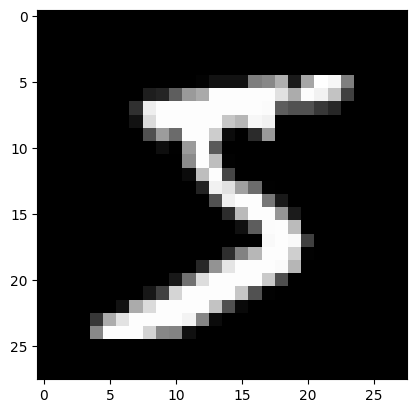

In [22]:
img = x_train[0]
print(img.shape)
print(img.min(), img.max())
plt.imshow(img, cmap='gray')

In [23]:
label = y_train[0]
print(label)

5


#### 데이터 전처리 (Data Preprocessing)

In [24]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0], x[0].size))

    for idx, data in enumerate(x):
        temp[idx ,:] = data.flatten()

    return temp

In [25]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [26]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [27]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return np.mean(np.power(y_true - y_pred, 2))

def cross_entropy_error(y_pred, y_true):
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    return -np.sum(y_true * np.log(y_pred + delta))

def cross_entropy_error_for_batch(y_pred, y_true):
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    batch_size = y_pred.shape[0]
    return -np.sum(y_true * np.log(y_pred + delta)) / batch_size

def cross_entropy_error_for_bin(y_pred, y_true):
    return 0.5 * np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def differential_1d(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
      temp_val = x[i]

      x[i] = temp_val + eps
      f_h1 = f(x)
      x[i] = temp_val - eps
      f_h2 = f(x)

      diff_value[i] = (f_h1 - f_h2) / (2*eps)
      x[i] = temp_val

    return diff_value

def differential_2d(f, X):
    if X.ndim == 1:
        return differential_1d(f, X)
    else :
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = differential_1d(f, x)

        return grad


#### 2층 신경망으로 구현

In [29]:
class MyModel():

  def __init__(self):

      def weight_init(input_nodes, hidden_nodes, output_nodes):
         np.random.seed(777)


         params = {}
         params['W1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
         params['b1'] = np.zeros(hidden_nodes)
         params['W2'] = 0.01 * np.random.randn(hidden_nodes, output_nodes)
         params['b2'] = np.zeros(output_nodes)

         return params

      self.params = weight_init(784, 64, 10)

  def predict(self, x):
      W1, W2 = self.params['W1'], self.params['W2']
      b1, b2 = self.params['b1'], self.params['b2']

      A1 = np.dot(x, W1) + b1
      Z1 = sigmoid(A1)
      A2 = np.dot(Z1, W2) + b2
      y = softmax(A2)
      return y

  def loss(self, x, y_true):
      y_pred = self.predict(x)
      return cross_entropy_error_for_bin(y_pred, y_true)

  def accuracy(self, x, y_true):
      y_pred = self.predict(x)
      y_argmax = np.argmax(y_pred, axis=1)
      y_true_argmax = np.argmax(y_true, axis=1)

      accuracy = np.mean(y_argmax == y_true_argmax)
      return accuracy

  def get_gradient(self, x, t):
      def loss_grad(grad):
          return self.loss(x, t)

      grad = {}
      grad['W1'] = differential_2d(loss_grad, self.params['W1'])
      grad['b1'] = differential_2d(loss_grad, self.params['b1'])
      grad['W2'] = differential_2d(loss_grad, self.params['W2'])
      grad['b2'] = differential_2d(loss_grad, self.params['b2'])

      return grad

#### 모델 생성 및 학습
- 시간 많이 소요

In [30]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()

for i in tqdm(range(epochs)):

    batch_idx = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]

    grad = model.get_gradient(x_batch, y_batch)

    for key in grad.keys():
        model.params[key] -= lr * grad[key]

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    train_accuracy = model.accuracy(x_train, y_train_ohe)
    test_accuracy = model.accuracy(x_test, y_test_ohe)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)

    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Test Accuracy: {}'.format(i+1, loss, train_accuracy, test_accuracy))

end_time = time.time()

print('총 학습 소요시간: {:.3f}s'.format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 465.9060502386832, Train Accuracy: 0.10441666666666667, Test Accuracy: 0.1028
Epoch: 2, Train Loss: 361.8440950226591, Train Accuracy: 0.09751666666666667, Test Accuracy: 0.0974
총 학습 소요시간: 73.211s


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재